<a href="https://colab.research.google.com/github/Aung505/myproject/blob/master/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import sklearn.impute 
import sklearn.preprocessing
%matplotlib inline 
sns.set(style="ticks") 
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats("retina")  

In [0]:
pd.set_option("display.width", 70) 

In [0]:
data = pd.read_csv("googleplaystore.csv") 

In [9]:
data.head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
data.dtypes 

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
data.shape 

(10841, 13)

In [12]:
data.isnull().sum() 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

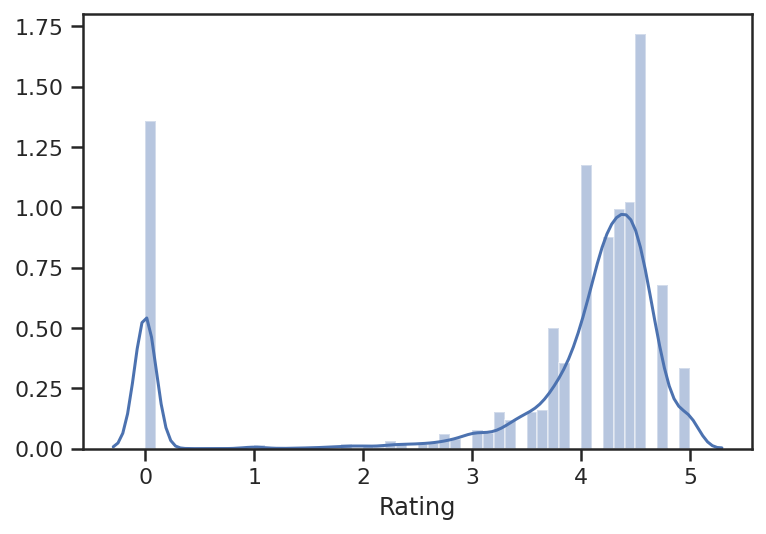

In [13]:
sns.distplot(data["Rating"].fillna(0));


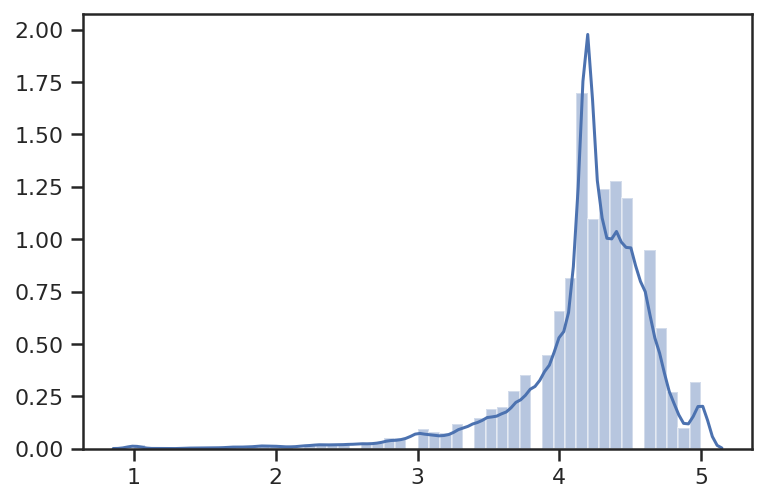

In [14]:
mean_imp = sklearn.impute.SimpleImputer(strategy="mean") 
mean_rat = mean_imp.fit_transform(data[["Rating"]]) 
sns.distplot(mean_rat);


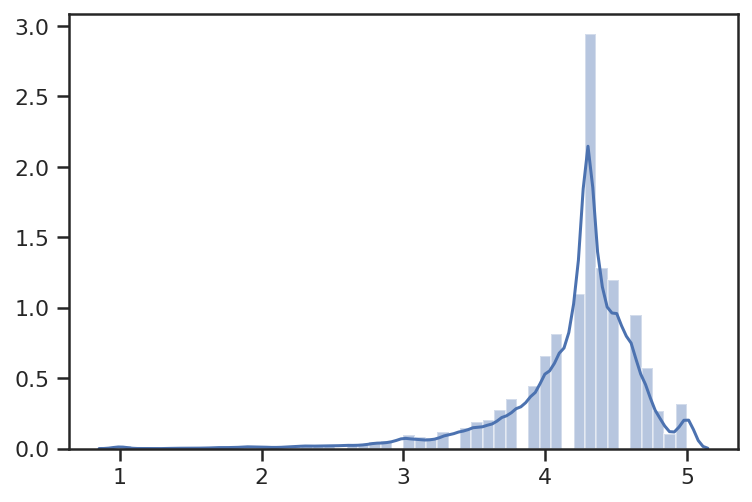

In [15]:
med_imp = sklearn.impute.SimpleImputer(strategy="median") 
med_rat = med_imp.fit_transform(data[["Rating"]]) 
sns.distplot(med_rat);


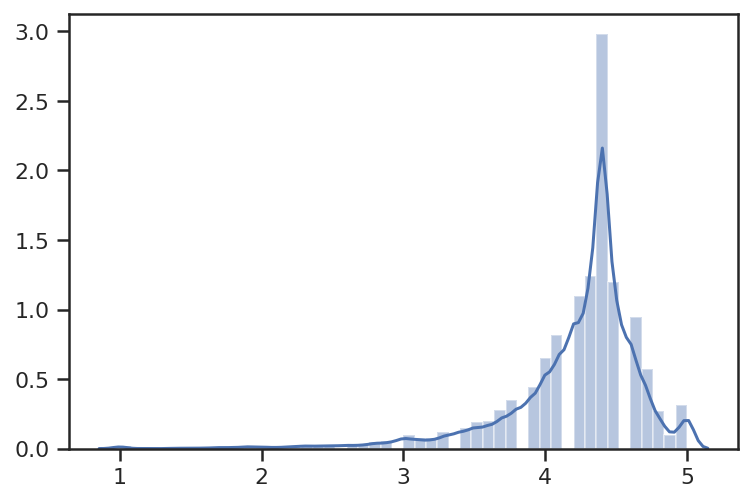

In [16]:
freq_imp = sklearn.impute.SimpleImputer(strategy="most_frequent") 
freq_rat = freq_imp.fit_transform(data[["Rating"]]) 
sns.distplot(freq_rat);


In [0]:
data["Rating"] = mean_rat 

In [20]:
types = data["Type"].dropna().astype(str)
types.value_counts() 

Free    10040
Paid      800
Name: Type, dtype: int64

In [21]:
le = sklearn.preprocessing.LabelEncoder() 
type_le = le.fit_transform(types) 
print(np.unique(type_le)) 
le.inverse_transform(np.unique(type_le)) 

[0 1]


array(['Free', 'Paid'], dtype=object)

In [23]:
type_oh = pd.get_dummies(types) 
type_oh.head() 

,Free,Paid
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [24]:
type_oh[type_oh["Paid"] == 1].head() 

,Free,Paid
234,0,1
235,0,1
290,0,1
291,0,1
427,0,1


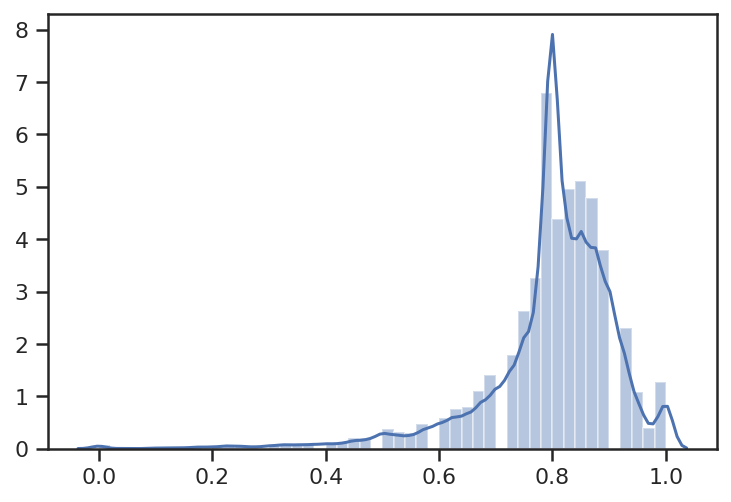

In [25]:
mm = sklearn.preprocessing.MinMaxScaler() 
sns.distplot(mm.fit_transform(data[["Rating"]]));


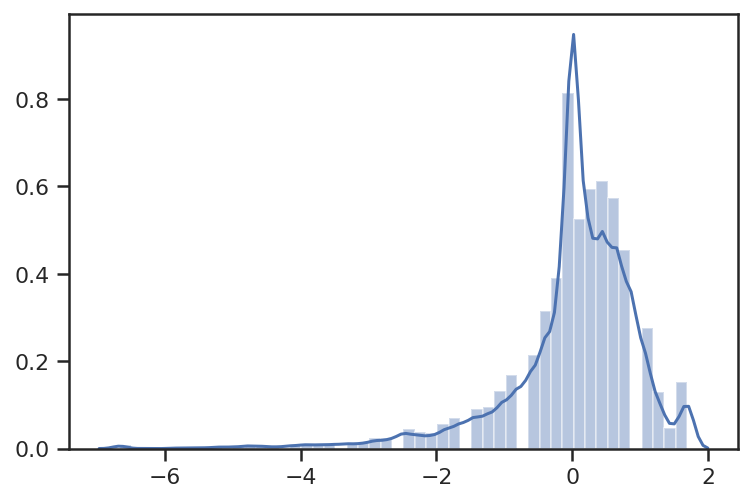

In [26]:
ss = sklearn.preprocessing.StandardScaler() 
sns.distplot(ss.fit_transform(data[["Rating"]]));
